In [ ]:
import pandas as pd
import nltk
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
# nltk.download('words')
words = set(nltk.corpus.words.words())

In [ ]:
file = pd.read_csv('Bitcoin_tweets.csv')

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
file.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
file.head(2)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False


In [ ]:
df = file.drop(['user_location', 'user_description', 'user_created', 'user_favourites', 'is_retweet'], axis = 1)

In [ ]:
df

,user_name,user_followers,user_friends,user_verified,date,text,hashtags,source
0,DeSota Wilson,8534.0,7605,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App
1,CryptoND,6769.0,1532,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android
2,Tdlmatias,128.0,332,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App
3,Crypto is the future,625.0,129,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,1249.0,1472,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App
...,...,...,...,...,...,...,...,...
2284921,Job Preference,1139.0,659.0,False,2022-02-09 20:55:00,#HIRING?\nSign up now https://t.co/o7lVlsCHXv\...,"['HIRING', 'Jobs', 'jobsearching', 'DataAnalyt...",Twitter Web App
2284922,𝑪𝒓𝒚𝒑𝒕𝒐 ⓚ𝒂𝒚𝒍𝒆🅡,1686.0,759.0,False,2022-02-09 20:54:50,Stopped out gg\n\nFirst 1R loss this month \n\...,['BTC'],Twitter Web App
2284923,Gjana Khan,39.0,0.0,False,2022-02-09 20:54:50,"@TylerSCrypto Hey broow, how is your trading g...",['BTC'],Twitter for Android
2284924,NAFIS AHMED,19.0,2251.0,False,2022-02-09 20:54:36,@list_energy @list_energy 's team is working h...,"['EnergyList', 'EList', 'Airdrop', 'cryptocurr...",Twitter for Android


In [ ]:
df.drop(df.query('user_verified != True').index)

,user_name,user_followers,user_friends,user_verified,date,text,hashtags,source
65906,Daily Express,879107.0,714.0,True,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,"['Bitcoin', 'bitcoin', 'btc', 'Crypto']",TweetDeck
66378,BTCC,81172.0,277.0,True,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,"['BTC', 'Bitcoin', 'crypto']",Twitter Web App
66447,BtcTurk | PRO,90749.0,10.0,True,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,"['Bitcoin', 'BTC', 'btcturkpro']",Twitter Web App
67137,LatestLY,69095.0,344.0,True,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,"['WhatsApp', 'Signal', 'Cryptocurrency']",TweetDeck
67248,Herbert R. Sim,147300.0,142305.0,True,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",['Bitcoin'],Twitter for Android
...,...,...,...,...,...,...,...,...
2283444,Real Vision,318857.0,1824.0,True,2022-02-09 23:13:42,What’s driving #BTC's recent price action? Wil...,"['BTC', 'Solana', 'Bitfinex']",Twitter Web App
2283771,Akeem Hunt,12013.0,801.0,True,2022-02-09 22:51:50,I want to see another 2013!😎🍷\n\n#BTC,['BTC'],Twitter for iPhone
2283797,Akeem Hunt,12013.0,801.0,True,2022-02-09 22:49:46,Are you accumulating right now ? 👀\n\n#Cryptoc...,"['Cryptocurrency', 'btc']",Twitter for iPhone
2284616,Numbrs,178157.0,54.0,True,2022-02-09 21:26:09,"Over the last year, the number of BTC transfer...",['BTC'],Twitter Web App


In [ ]:
real = df.drop(df.query('user_verified != True').index) #Assume verified users are not bots

# Bot and Noise Removal
## Method 1 - Find users with repeatedly similar tweets

Algo:
1) Group tweets by user name for all users that are not verified and with more than 5 tweets
2) Evaluate similarity of all tweets to their first (in dataset)
3) Find average similarity score
4) Drop tweets from users with similarity rating of 0.7 or more

In [ ]:
from difflib import SequenceMatcher
from tqdm.notebook import tqdm

In [ ]:
by_user = df.query('user_verified == False').groupby('user_name').agg({'text' : lambda x : list(x)}) 

In [ ]:
by_user[by_user['text'].str.len() > 5]

,text
user_name,
!!!,[Buy #Bitcoin and choose OVER 300 payment meth...
"!/!#/8#'/,/;'./'",[Would rather your #cryptoportfolio increase i...
!John Doe!,"[Hey, @coinbase and @CoinbasePro, since you sa..."
!qhieparcok,[@Blockswap_team @CoinMarketCap Thanks for giv...
"""Big T"" Fauci, King of Science.",[Nassim Taleb talks a lot of shit about #Bitco...
...,...
🪖DevilDog,[When most were calling for #Bitcoin bear mark...
🪙 BARBER BTC 🪙,[You think #china #plebs are going to sell thi...
🪙 Crypto Idea 💡,[$BTC DEATH CROSS has Occured. 📉\nLast cross w...


In [ ]:
by_user_more5 = by_user[by_user['text'].str.len() > 5]
all_score = []
for user_name, v in tqdm(by_user_more5.iterrows(), total = len(by_user_more5)):
    texts = v[0]
    first_text = texts[0]
    scores = []
    for t in texts[1:]:
        scores.append(SequenceMatcher(None, first_text, t).ratio())
    all_score.append(sum(scores)/len(scores))

  0%|          | 0/44221 [00:00<?, ?it/s]

In [ ]:
by_user_more5['scores'] = all_score

<ipython-input-129-2090692dc709>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_user_more5['scores'] = all_score


<AxesSubplot:>

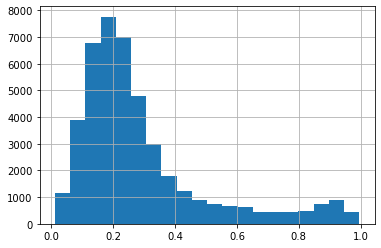

In [ ]:
by_user_more5.scores.hist(bins = 20)

In [ ]:
bot_user_names = by_user_more5[(by_user_more5['scores'] >= 0.7)].index

In [ ]:
real = df[~df['user_name'].isin(bot_user_names)] 

## Method 2 - By source of tweets
Algo:
1) Remove users using sources with less than 5 total users
2) Remove users using sources with 'bot' in the name (except Tweetbot for iOS)

In [ ]:
df.query('source != source')

,user_name,user_followers,user_friends,user_verified,date,text,hashtags,source
144,timmyfredy,98.0,667,False,2021-02-10 22:52:19,"In First For Commercial Bank, Blue Ridge ATMs ...","['crypto', 'rich', 'money', 'btc', 'bitcoin']",NaN
198,Crypto Analyser,5.0,1,False,2021-02-10 22:25:49,Current time = 03:55:49 IST \n🔸 USDT(INR): 74....,NaN,NaN
387,Crablinski,153.0,0,False,2021-02-10 21:04:22,"BTC-USD\n🔻 44,377\nDOWN spike of -200\n(since ...","['bitcoin', 'btc', 'trading']",NaN
474,Crypto Analyser,5.0,1,False,2021-02-10 20:25:48,Current time = 01:55:48 IST \n🔸 USDT(INR): 74....,NaN,NaN
544,Crocobot - Crypto Trading Platform,23.0,67,False,2021-02-10 20:00:12,Hello! Here are the market info today :)\n\n#B...,['Bitcoin'],NaN
...,...,...,...,...,...,...,...,...
2248712,CoinConsume,136.0,3.0,False,2022-01-20 10:19:41,Xethost is accepting payments with #ADA #MANA ...,NaN,NaN
2254695,New Coins Listing,6377.0,71.0,False,2022-01-20 02:01:27,New market pair/s on #GateIo:https://t.co/2B87...,NaN,NaN
2283407,topstonks,3046.0,1172.0,False,2022-02-09 23:18:09,$BTC working its way into the top 10 most ment...,NaN,NaN
2283408,Via https://t.co/p6iec02QvX,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[(df['source'].str.contains('bot', case = False, na = False)) & (df['source'] != 'Tweetbot for iΟS')]['source'].value_counts() #Tweetbot is an app name - not bot

HoBaBot                      13137
TwinyBots                     7156
DYORCryptoBot                 6480
CryptoSquawkBot               4693
Cheap Bots, Done Quick!       3764
                             ...  
TRANSBOT2                        1
Even Newer Newer Dank Bot        1
Crypto Scanner Bot               1
adamexBot                        1
EmmaBot42                        1
Name: source, Length: 229, dtype: int64

In [ ]:
real[(real['source'].str.contains('bot', case = False, na = False)) & (real['source'] != 'Tweetbot for iΟS')]['source'].value_counts().loc[lambda x: x < 5]

CardinalFangBot     4
CMEbot              4
Satish Bot          4
sweet_tradebot      4
John-McClane-Bot    3
                   ..
DeepBlueTeamBot     1
TRANSBOT2           1
ContestantBot       1
ztmbot-srishti2     1
LeftHandBot         1
Name: source, Length: 77, dtype: int64

In [ ]:
source_users = real.groupby('source').agg({'user_name':pd.unique})

In [ ]:
bot_sources = source_users[source_users['user_name'].str.len() <= 5].index

In [ ]:
real = real[~real['source'].isin(bot_sources)]

In [ ]:
real = real[~(real['source'].str.contains('bot', case = False, na = False)) & (real['source'] != 'Tweetbot for iΟS')]

In [ ]:
real[real['user_name'].str.contains('bot', na = False, case = False)].sort_values('user_name')

,user_name,user_followers,user_friends,user_verified,date,text,hashtags,source
1982579,#BottomFishing 🎣,10085.0,93.0,False,2021-12-30 14:43:14,I'm thinking we don't see $NDA | $NPPTF | @Nep...,"['BottomFishing', 'BitcoinMining', 'Bitcoin', ...",Twitter Web App
1404733,#BottomFishing 🎣,9882.0,94,False,2021-10-21 13:41:53,"If $LUXX | $LUXFF | had all 3,590 rigs in toda...","['BoTToMFiSHiNG', 'Bitcoin', 'Crypto', 'Bitcoi...",Twitter Web App
863765,#BottomFishing 🎣,9465.0,106.0,False,2021-08-20 22:28:04,If $BTC | $BTC.X pops 'n sticks $50k over the ...,"['bearish', 'BottomFishing', 'Bitcoin', 'Bitco...",StockTwits Web
861501,#BottomFishing 🎣,9465.0,106.0,False,2021-08-21 00:56:16,3/ #CryptoStocks: CONGRATS TO TODAY'S 10%+ GAI...,"['CryptoStocks', 'BottomFishing', 'Bitcoin', '...",Twitter Web App
1223119,#BottomFishing 🎣,9605.0,108.0,False,2021-09-10 14:01:22,$LUXX | $LUXFF | @LuxxfolioH | https://t.co/6f...,"['BottomFishing', 'Bitcoin', 'Crypto', 'Bitcoi...",StockTwits Web
...,...,...,...,...,...,...,...,...
815654,🤖🚀OB Trader - AI Trading Bots,789.0,1925.0,False,2021-08-07 11:00:01,Binance Pay Expands Bitcoin Payment Rails to S...,"['crypto', 'bitcoin', 'cryptocurrency', 'block...",Twitter Web App
426058,🤖🚀OB Trader - AI Trading Bots,804.0,1786.0,False,2021-07-22 16:00:02,Elon Musk Says Tesla Will “Most Likely” Resume...,"['crypto', 'Bitcoin', 'ETH', 'trading', 'OBTra...",Twitter Web App
380378,🤖🚀OB Trader - AI Trading Bots,804.0,1786.0,False,2021-07-24 14:00:01,Bitcoin’s Big Institutional Week: JPMorgan Bri...,"['crypto', 'bitcoin', 'cryptocurrency', 'block...",Twitter Web App
341386,🤖🚀OB Trader - AI Trading Bots,801.0,1727.0,False,2021-07-02 13:26:27,Fixed Price Subscription: 🛰 Venturer Plan\n\nC...,"['OBTrader', 'crypto', 'bitcoin', 'blockchain'...",Twitter Web App


In [ ]:
real

,user_name,user_followers,user_friends,user_verified,date,text,hashtags,source
0,DeSota Wilson,8534.0,7605,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App
1,CryptoND,6769.0,1532,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android
2,Tdlmatias,128.0,332,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,1249.0,1472,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App
5,ZerrBenz™ ⚔ ✪ 20732,742.0,716,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App
...,...,...,...,...,...,...,...,...
2284921,Job Preference,1139.0,659.0,False,2022-02-09 20:55:00,#HIRING?\nSign up now https://t.co/o7lVlsCHXv\...,"['HIRING', 'Jobs', 'jobsearching', 'DataAnalyt...",Twitter Web App
2284922,𝑪𝒓𝒚𝒑𝒕𝒐 ⓚ𝒂𝒚𝒍𝒆🅡,1686.0,759.0,False,2022-02-09 20:54:50,Stopped out gg\n\nFirst 1R loss this month \n\...,['BTC'],Twitter Web App
2284923,Gjana Khan,39.0,0.0,False,2022-02-09 20:54:50,"@TylerSCrypto Hey broow, how is your trading g...",['BTC'],Twitter for Android
2284924,NAFIS AHMED,19.0,2251.0,False,2022-02-09 20:54:36,@list_energy @list_energy 's team is working h...,"['EnergyList', 'EList', 'Airdrop', 'cryptocurr...",Twitter for Android


## Method 3 - Based on suspected bots as Y, cluster users based on word vector
Algo:
1) Vectorize words by users
2) Users in cluster with known bots are classified as bots

In [ ]:
bot_tweets.head(1)

,user_name,user_followers,user_friends,user_verified,date,text,hashtags,source
3,Crypto is the future,625.0,129,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it


In [ ]:
df.index.map(lambda x : 1 if x in bot_tweets.index else 0)

Int64Index([0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=2284926)

In [ ]:
bot_classification = df.copy()
bot_classification['bot'] = df.index.map(lambda x : 1 if x in bot_tweets.index else 0)

In [ ]:
bot_classification.head(10)

,user_name,user_followers,user_friends,user_verified,date,text,hashtags,source,bot
0,DeSota Wilson,8534.0,7605,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,0
1,CryptoND,6769.0,1532,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,0
2,Tdlmatias,128.0,332,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,0
3,Crypto is the future,625.0,129,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,1
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,1249.0,1472,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,0
5,ZerrBenz™ ⚔ ✪ 20732,742.0,716,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,0
6,Bitcoin-Bot,131.0,84,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,1
7,Cryptocurrencies / EUR,4052.0,1,False,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR,0
8,Mikcoin,104.0,41,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,0
9,DeSota Wilson,8534.0,7605,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,0


In [ ]:
bot_classification = bot_classification.dropna(subset=['text'])

In [ ]:
# ! pip install gensim

     |████████████████████████████████| 24.0 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 15.7 MB/s eta 0:00:01


In [ ]:
corpus = bot_classification['text'].apply(lambda x : x.split(' '))

In [ ]:
len(corpus)

2284924

In [ ]:
from gensim.models import Word2Vec
count_matrix = Word2Vec(corpus)
# count = CountVectorizer()
# count_matrix = count.fit_transform(bot_classification['text'])

In [ ]:
import pickle
with open('corpus.pkl', 'wb+') as f:
    pickle.dump(count_matrix, f)

In [ ]:
count_matrix.corpus_count

2284924

In [ ]:
w2v_vectors = count_matrix.wv.vectors # here you load vectors for each word in your model
w2v_indices = count_matrix.wv.key_to_index

In [ ]:
import numpy as np
def vectorize(line): 
    words = []
    for word in line: # line - iterable, for example list of tokens 
        try:
            w2v_idx = w2v_indices[word]
        except KeyError: # if you does not have a vector for this word in your w2v model, continue 
            continue
        words.append(w2v_vectors[w2v_idx])
        if words: 
            words = np.asarray(words)
            min_vec = words.min(axis=0)
            max_vec = words.max(axis=0)
            return np.concatenate((min_vec, max_vec))
        if not words:
            return None 

In [ ]:
bot_classification['text_vec'] = bot_classification['text'].apply(vectorize)

<ipython-input-326-7c7eea30a6af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_classification['text_vec'] = bot_classification['text'].apply(vectorize)


In [ ]:
unique_user = bot_classification.drop_duplicates(subset=['user_name'])

In [ ]:
user_vectors = pd.DataFrame(unique_user['text_vec'].to_list())

In [ ]:
with open('user_vectors.pkl', 'wb+') as f:
    pickle.dump(user_vectors, f)

In [ ]:
user_vectors.shape

(377965, 201)

In [ ]:
from sklearn.decomposition import PCA
# count_matrix.wv.key_to_index
# vectors = count_matrix.wv.vectors
# words = list(count_matrix.wv.key_to_index)
pca = PCA(n_components=15)
PCA_result = pca.fit_transform(user_vectors)

In [ ]:
sum(pca.explained_variance_ratio_)

0.964948896138235

In [ ]:
kmeans = KMeans(n_clusters=100)
kmeans.fit(PCA_result)

KMeans(n_clusters=100)

In [ ]:
kmeans.labels_

array([ 6, 50, 10, ..., 26, 25, 36], dtype=int32)

In [ ]:
test_cluster = unique_user
test_cluster['cluster'] = kmeans.labels_

<ipython-input-432-3bcf129ad994>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cluster['cluster'] = kmeans.labels_


In [ ]:
cluster_bots = test_cluster.groupby('cluster').agg({'bot':'sum','user_name':pd.Series.nunique})

In [ ]:
cluster_bots['ratio'] = cluster_bots['bot'] / cluster_bots['user_name']

In [ ]:
cluster_bots.sort_values('bot', ascending = False)

,bot,user_name,ratio
cluster,,,
1,1679,114461,0.014669
2,465,25742,0.018064
3,267,45917,0.005815
15,200,9045,0.022112
6,184,12456,0.014772
...,...,...,...
71,0,46,0.000000
64,0,311,0.000000
55,0,68,0.000000


In [ ]:
cluster_bots.sort_values('ratio', ascending = False).query('ratio > 0.1')

,bot,user_name,ratio
cluster,,,
90,4,15,0.266667
97,5,28,0.178571
35,20,143,0.139860
80,10,83,0.120482


In [ ]:
bot_cluster = cluster_bots.sort_values('ratio', ascending = False).query('ratio > 0.1').index.to_list()

In [ ]:
bot_users = test_cluster[test_cluster['cluster'].isin(bot_cluster)]['user_name']

In [ ]:
real[real['user_name'].isin(bot_users)]

,user_name,user_followers,user_friends,user_verified,date,text,hashtags,source
7,Cryptocurrencies / EUR,4052.0,1,False,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR
11,BittrexPrices,3131.0,1,False,2021-02-10 23:51:25,🔄 Prices update in $USDT (1 hour):\n\n$BTC - 4...,NaN,Bittrex Prices
39,KrakenPrices,3210.0,1,False,2021-02-10 23:35:12,🔄 Prices update in $USD (1 hour):\n\n$BTC - 45...,NaN,Kraken prices
97,Cryptocurrencies / USD,3910.0,1,False,2021-02-10 23:09:39,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to USD
143,Cryptocurrencies / EUR,4052.0,1,False,2021-02-10 22:52:31,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR
...,...,...,...,...,...,...,...,...
2280784,Raj Agrawal,329.0,271.0,False,2022-02-09 15:05:15,Top #Crypto (by mkt cap)\n\n#Bitcoin $44185.4(...,"['Crypto', 'Bitcoin', 'Ethereum', 'Tether', 'B...",Raj’s Automated Tweets
2282392,BakedNet🌮,521.0,23.0,False,2022-02-09 14:30:03,"[₿] #Bitcoin Daily $BTC [₿]\n\nKraken❯\nA:$44,...",['Bitcoin'],BakedNetwork
2283165,STUDIO192.NL,1135.0,617.0,False,2022-02-09 23:49:33,"[28] #Appelscha #Multiply your #BTC, #Free #Fa...","['Appelscha', 'Multiply', 'BTC', 'Free', 'Fauc...",TweetDeck
2283356,STUDIO192.NL,1135.0,617.0,False,2022-02-09 23:24:20,"[23] #NewYork It's not new, but it's #steady, ...","['NewYork', 'steady', 'cloudmine', 'Bitcoins',...",TweetDeck


In [ ]:
real = real[~real['user_name'].isin(bot_users)]

In [ ]:
real['date'] = pd.to_datetime(real['date'], errors='coerce').dt.date

<ipython-input-454-aa8425b8fe18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['date'] = pd.to_datetime(real['date'], errors='coerce').dt.date


In [ ]:
real.to_csv('twitter_remove_bot.csv', index = False)

In [ ]:
# Original Dataset #tweets - Final output #tweets
2284926 - 1957966

326960

<br><br><br><br><br><br><br><br><br><br><br><br>

In [ ]:
prices = pd.read_csv('BitCoin_hist_data.csv').drop(prices.columns[0], axis = 1)

In [ ]:
prices['date'] = pd.to_datetime(prices['date']).dt.date

In [ ]:
daily_vol = real.groupby('date').count()['text']

In [ ]:
price_tweet = prices.merge(daily_vol, on = 'date', how = 'inner')

<AxesSubplot:xlabel='date'>

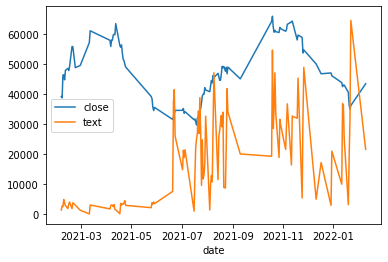

In [ ]:
price_tweet.set_index('date')[['close','text']].plot()

<br><br><br><br><br><br><br><br><br>

In [ ]:
from textblob import TextBlob

In [ ]:
df = df.dropna(subset=['text'])

In [ ]:
df.shape

(2284924, 6)

In [ ]:
# df["sentiment"] = df["text"].progress_apply(lambda x : TextBlob(x).sentiment)

In [ ]:
df["sentiment"]

In [ ]:
import re

In [ ]:
df['clean_text'] = df['text'].progress_apply(lambda x : re.sub('(@.+?|#.+?|https?:\/\/.+?)(?=\s|$)', '', x).strip())

  0%|          | 0/2284924 [00:00<?, ?it/s]

<ipython-input-56-94f35b5f21fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].progress_apply(lambda x : re.sub('(@.+?|#.+?|https?:\/\/.+?)(?=\s|$)', '', x).strip())


In [ ]:
df["clean_sentiment"] = df["clean_text"].progress_apply(lambda x : TextBlob(x).sentiment)

  0%|          | 0/2284924 [00:00<?, ?it/s]

<ipython-input-59-5eff3bc4c097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_sentiment"] = df["clean_text"].progress_apply(lambda x : TextBlob(x).sentiment)


In [ ]:
df['clean_polarity'], df['clean_subjectivity'] = df['clean_sentiment'].str[0], df['clean_sentiment'].str[1]

<ipython-input-69-eb7887aa918d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_polarity'], df['clean_subjectivity'] = df['clean_sentiment'].str[0], df['clean_sentiment'].str[1]


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

<ipython-input-87-cd635b6e44dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date


<AxesSubplot:xlabel='date'>

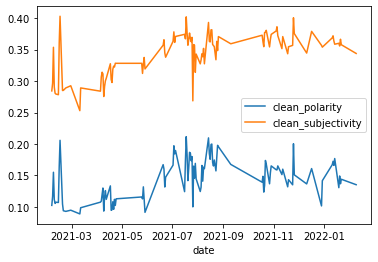

In [ ]:
df.groupby('date').mean()[['clean_polarity', 'clean_subjectivity']].plot(kind = 'line')

In [ ]:
df.groupby('date').count()

,user_followers,user_verified,text,hashtags,source,clean_text,clean_sentiment,clean_polarity,clean_subjectivity
date,,,,,,,,,
2021-02-05,1694,1694,1694,1291,1683,1694,1694,1694,1694
2021-02-06,3278,3278,3278,2491,3244,3278,3278,3278,3278
2021-02-07,3030,3030,3030,2324,2990,3030,3030,3030,3030
2021-02-08,5647,5647,5647,4614,5601,5647,5647,5647,5647
2021-02-09,4350,4350,4350,3434,4305,4350,4350,4350,4350
...,...,...,...,...,...,...,...,...,...
2022-01-19,3673,3673,3673,3673,3673,3673,3673,3673,3673
2022-01-20,22063,22063,22063,22057,22057,22063,22063,22063,22063
2022-01-21,35669,35669,35669,35664,35664,35669,35669,35669,35669


In [ ]:
df['date'].dt.date

0          2021-02-10
1          2021-02-10
2          2021-02-10
3          2021-02-10
4          2021-02-10
              ...    
2284921    2022-02-09
2284922    2022-02-09
2284923    2022-02-09
2284924    2022-02-09
2284925    2022-02-09
Name: date, Length: 2284924, dtype: object